In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Exploratory Data Analysis (EDA)

To understand the dataset, we perform some initial exploration using the following steps:

### 1. Load the Dataset  
Read the dataset from a CSV file into a DataFrame.  

### 2. Basic Information  
- Check the shape of the dataset (number of rows and columns).  
- Display a summary of the dataset, including column names, data types, and missing values.  

### 3. Preview the Data  
- Display the first few rows to get an overview of the dataset.  
- Display the last few rows to check the end of the dataset.  

### 4. Statistical Summary  
- Generate descriptive statistics for numerical columns, such as mean, standard deviation, and quartiles.  
- Count the unique values in each column to identify categorical variables and potential inconsistencies.  

### 5. Missing Values  
- Check for missing values in each column to determine if data cleaning is needed.  


In [30]:
data.head()
data.tail()
data.describe()
data.nunique()
data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  C                         36285 non-null  int64  
 12  notC                      36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,C,notC,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Outlier Detection and Visualization

To ensure data quality, we analyze outliers in numerical columns using the Interquartile Range (IQR) method and visualize them with boxplots.

### 1. Load the Dataset  
We begin by reading the dataset from a CSV file into a DataFrame.

### 2. Selecting Numerical Columns  
Only numerical columns (`int64` and `float64` types) are considered for outlier detection.

### 3. Detecting Outliers Using the IQR Method  
The IQR (Interquartile Range) method is used to identify outliers:  
- **Q1 (25th percentile)** and **Q3 (75th percentile)** are calculated.  
- The **IQR = Q3 - Q1** is determined.  
- Any values outside **[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]** are considered outliers.  
- The number of outliers in each numerical column is stored in a dictionary.

### 4. Visualizing Outliers with Boxplots  
- Boxplots are created for each numerical column to visually inspect the presence of outliers.  
- A grid layout is used to efficiently display all boxplots in a single figure.  
- Titles are added to each plot for better readability.  

This analysis helps in understanding the distribution of numerical features and identifying extreme values that may impact model performance.


In [31]:
# Select numerical columns only
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Function to find outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]  # Count of outliers

# Apply function to each numerical column
outlier_counts = {col: detect_outliers(data, col) for col in num_cols}

# Display results
print(outlier_counts)

{'number of adults': 10175, 'number of children': 2702, 'number of weekend nights': 21, 'number of week nights': 324, 'car parking space': 1124, 'lead time': 1332, 'repeated': 930, 'C': 338, 'notC': 812, 'average price ': 1696, 'special requests': 762}


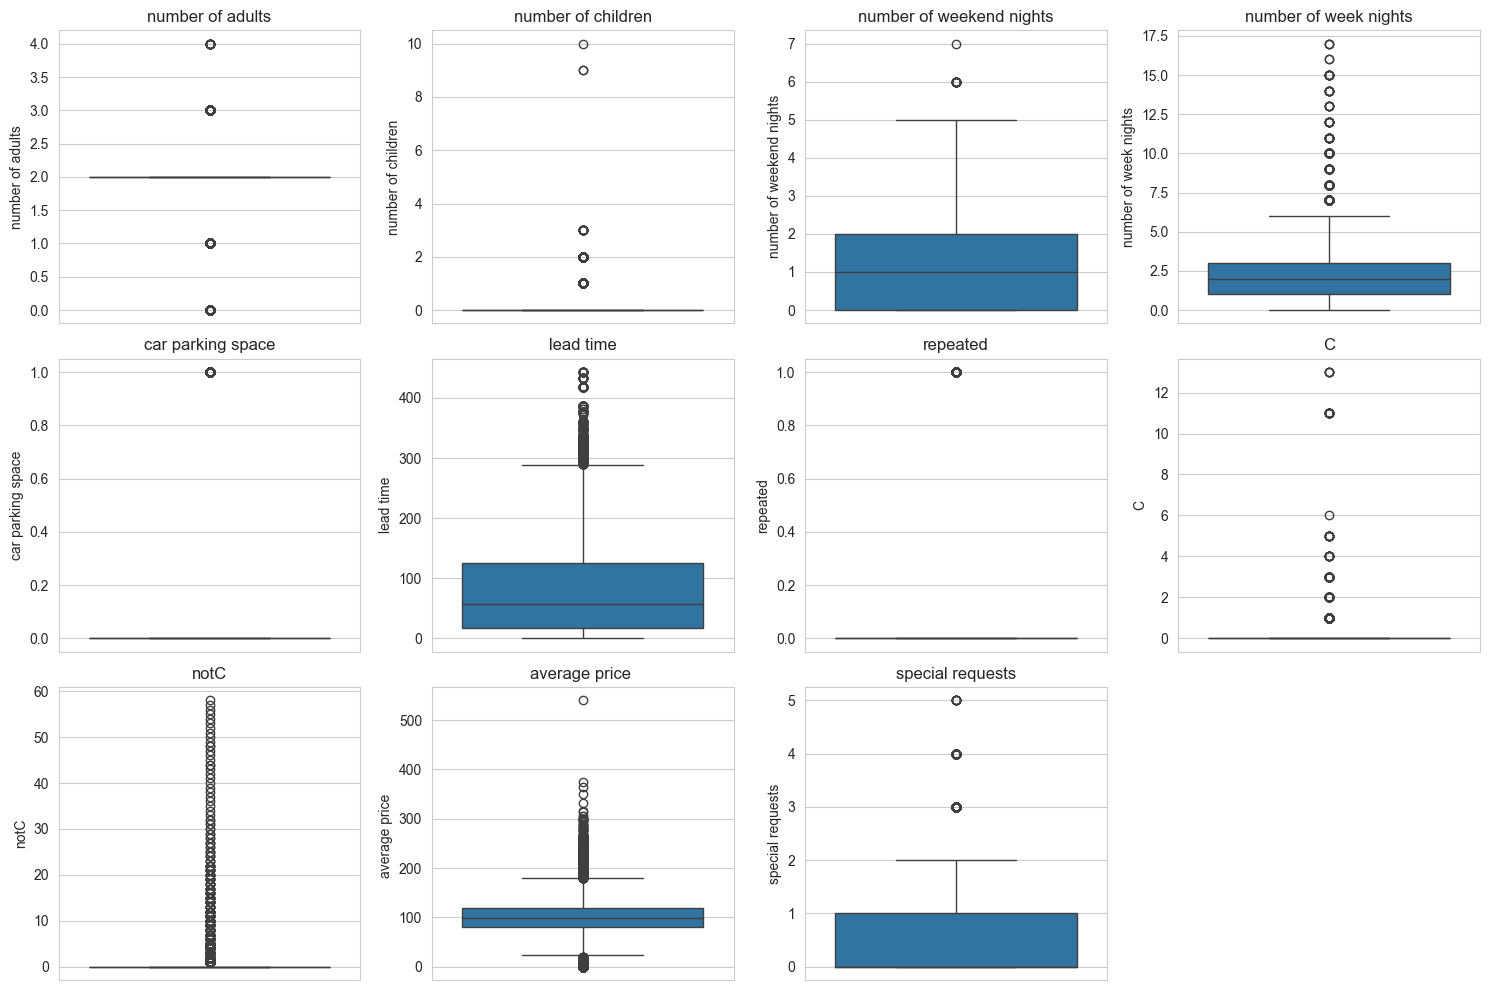

In [32]:
# Select numerical columns only
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot boxplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size based on number of columns
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation Analysis and Pairwise Relationships

To understand the relationships between numerical variables, we perform correlation analysis and visualize the data using heatmaps and pair plots.

### 1. Selecting Numerical Columns

### 2. Correlation Heatmap  
- A **heatmap** is used to visualize these correlations, where:

### 3. Pair Plot (Scatterplot Matrix)


In [33]:
num_cols = data.select_dtypes(include=['int64', 'float64'])
corelation = num_cols.corr()

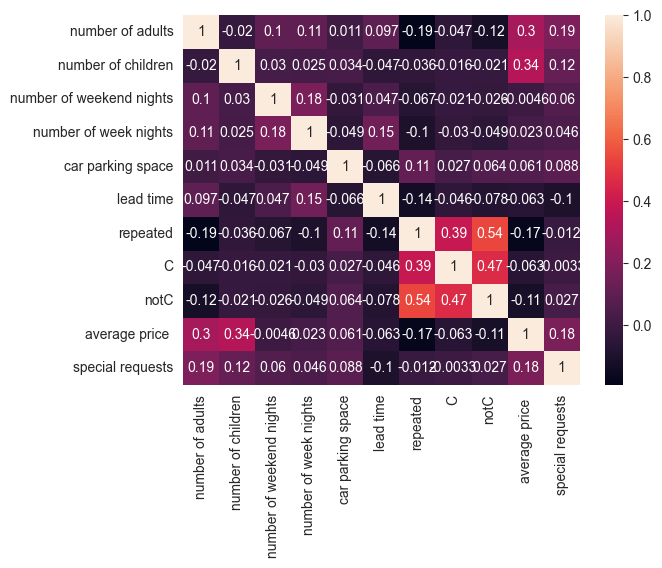

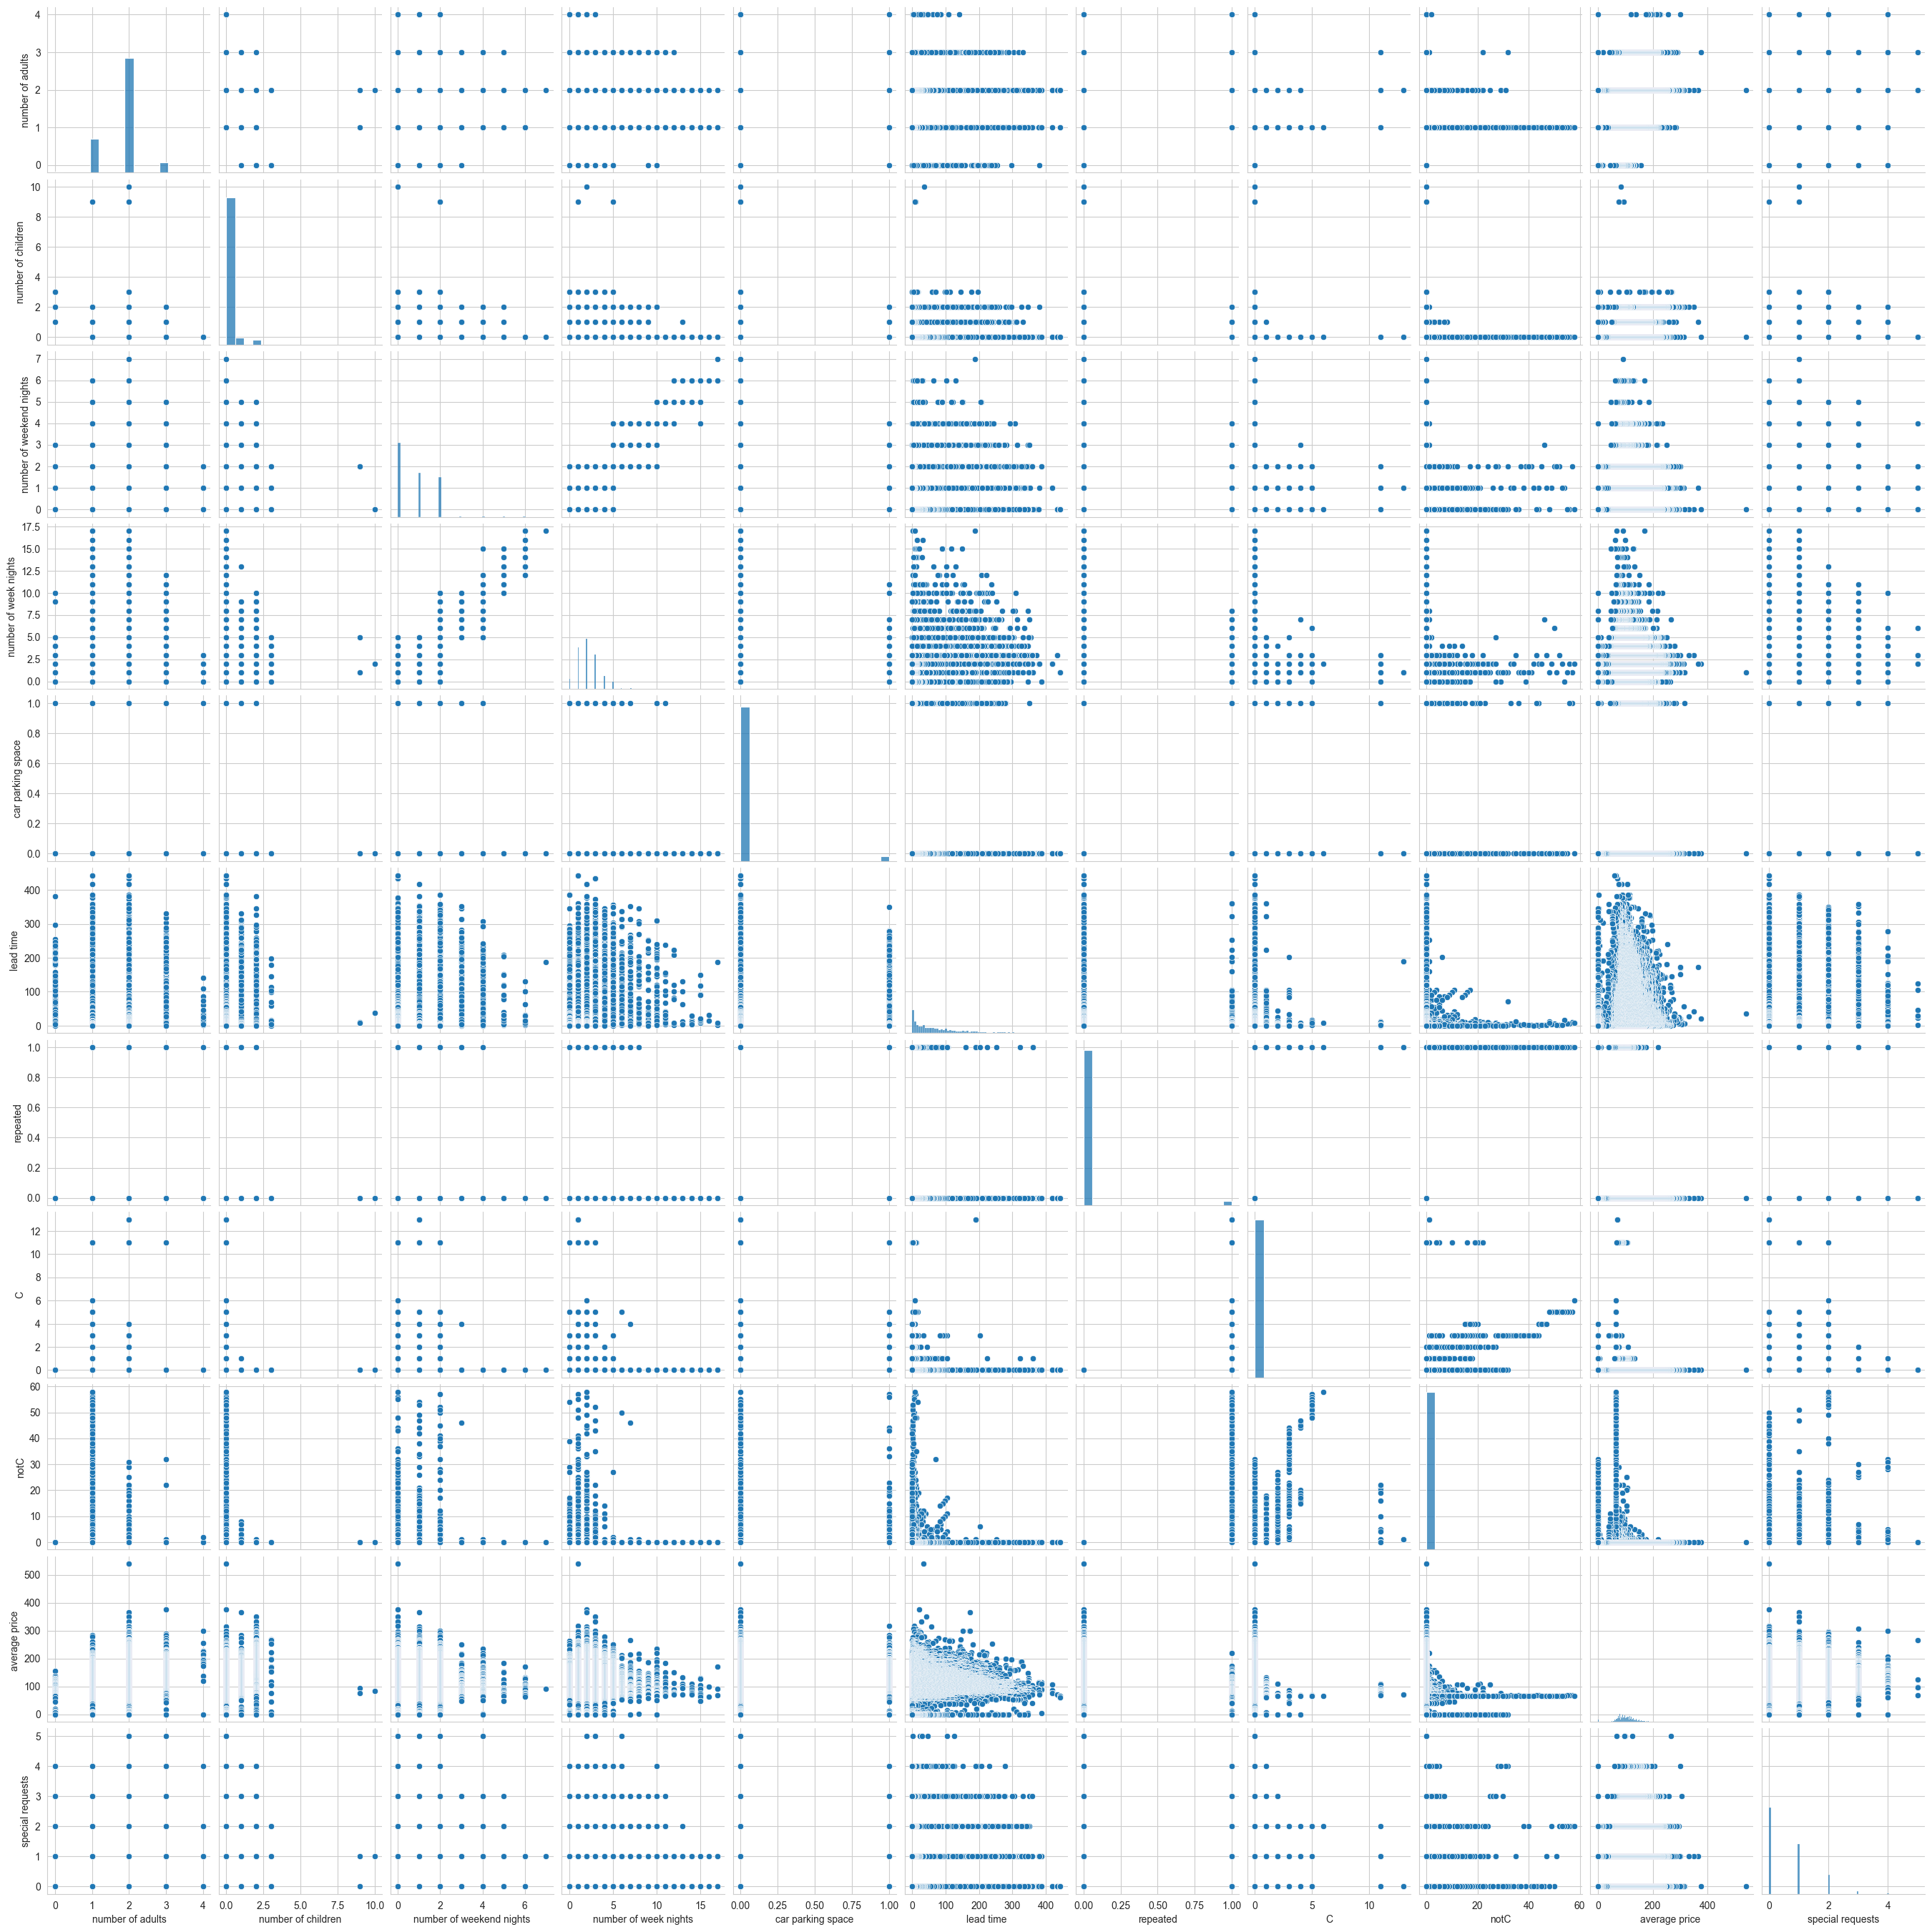

In [20]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)
sns.pairplot(data)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\2232026257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="booking status", palette=["red", "green"])


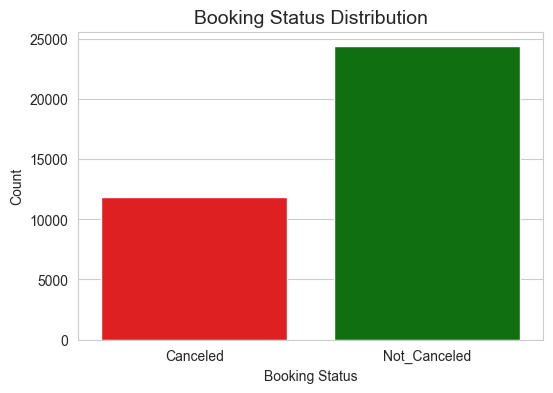

booking status
Not_Canceled    67.234394
Canceled        32.765606
Name: proportion, dtype: float64

In [34]:
# Set style for visualizations
sns.set_style("whitegrid")

# Count of canceled vs. not canceled bookings
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="booking status", palette=["red", "green"])
plt.title("Booking Status Distribution", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

# Check cancellation rate
cancellation_rate = data["booking status"].value_counts(normalize=True) * 100
cancellation_rate


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\3611330518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="booking status", y="lead time", palette=["red", "green"])


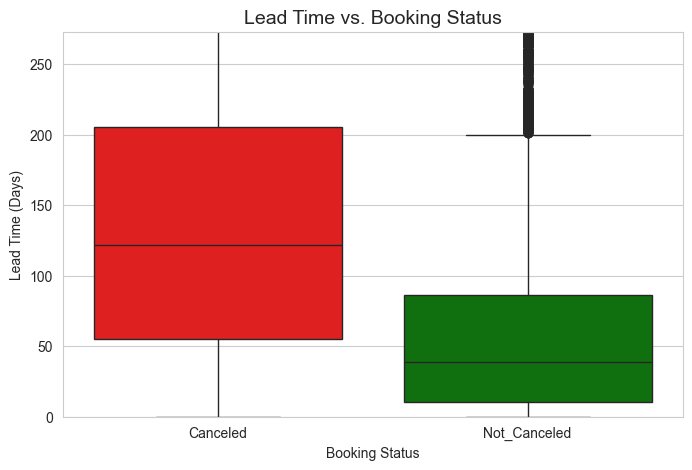

booking status
Canceled        139.219615
Not_Canceled     58.933678
Name: lead time, dtype: float64

In [35]:
# Analyze the relationship between lead time and booking status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking status", y="lead time", palette=["red", "green"])
plt.title("Lead Time vs. Booking Status", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (Days)")
plt.ylim(0, data["lead time"].quantile(0.95))  # Removing extreme outliers for better visualization
plt.show()

# Compute mean lead time for each status
lead_time_means = data.groupby("booking status")["lead time"].mean()
lead_time_means


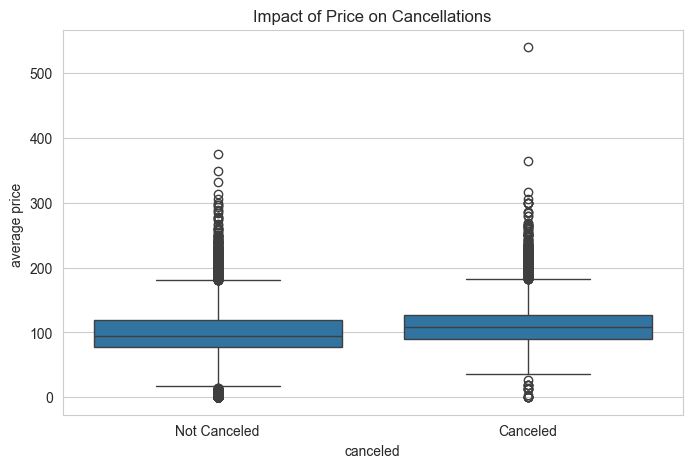

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\920719916.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="room type", y="canceled", data=data, ci=None, order=data["room type"].value_counts().index)


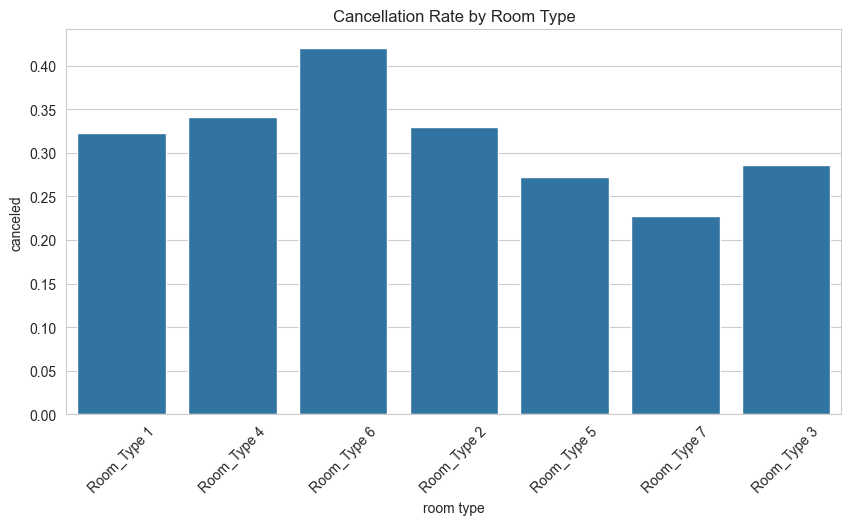

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\920719916.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="market segment type", y="canceled", data=data, ci=None, order=data["market segment type"].value_counts().index)


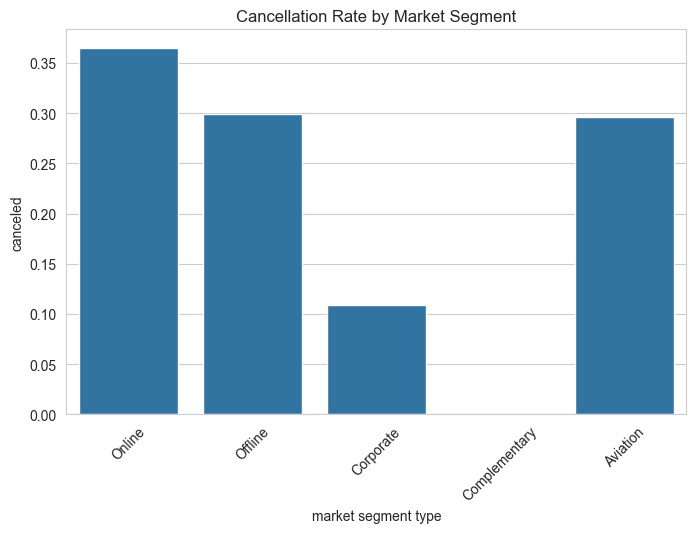

In [38]:

# Convert booking status to binary (1 = Canceled, 0 = Not_Canceled)
data["canceled"] = data["booking status"].apply(lambda x: 1 if x == "Canceled" else 0)

# Price vs. Cancellations
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["canceled"], y=data["average price "])
plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.title("Impact of Price on Cancellations")
plt.show()

# Room Type vs. Cancellations
plt.figure(figsize=(10, 5))
sns.barplot(x="room type", y="canceled", data=data, ci=None, order=data["room type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Room Type")
plt.show()

# Market Segment vs. Cancellations
plt.figure(figsize=(8, 5))
sns.barplot(x="market segment type", y="canceled", data=data, ci=None, order=data["market segment type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Market Segment")
plt.show()


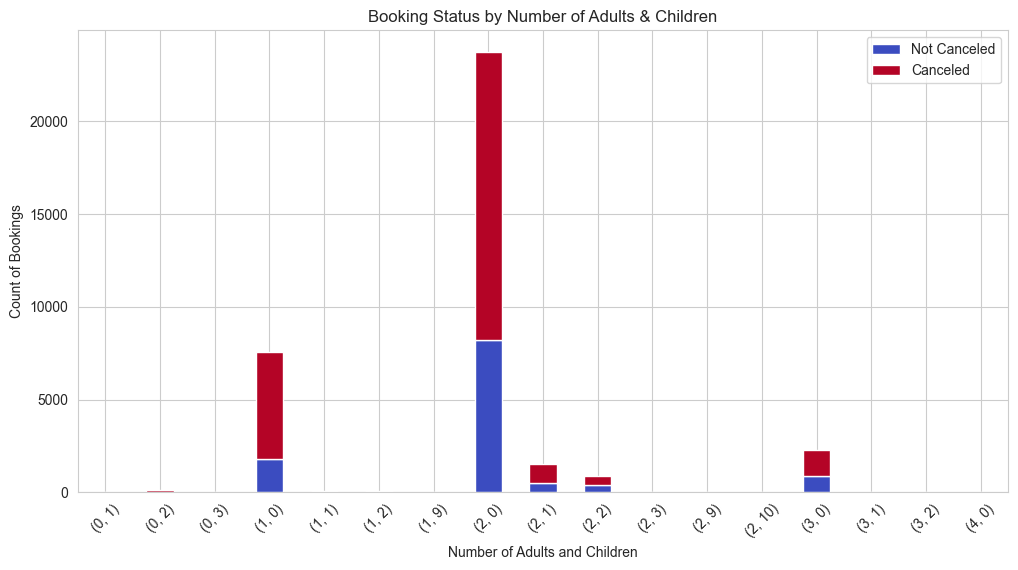

In [42]:
# Aggregate data by number of adults, children, and booking status
status_counts = data.groupby(['number of adults', 'number of children', 'booking status']).size().unstack()

# Plot the booking status distribution
status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Number of Adults and Children")
plt.ylabel("Count of Bookings")
plt.title("Booking Status by Number of Adults & Children")
plt.legend(["Not Canceled", "Canceled"])
plt.xticks(rotation=45)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\1094958983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["number of adults"] + data["number of children"], y=data["average price"], palette="viridis")


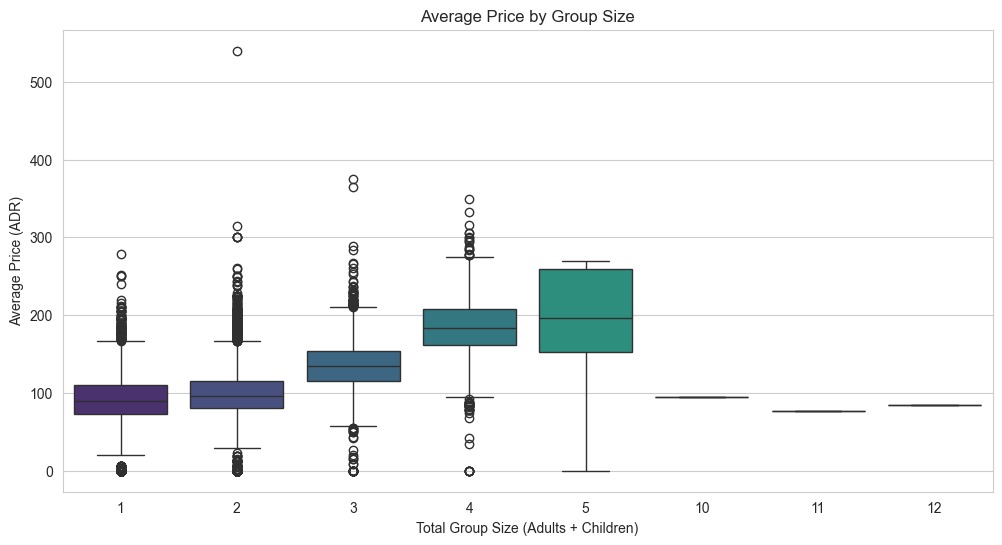

In [43]:
plt.figure(figsize=(12, 6))

# Plot boxplot to show distribution of average price for different group sizes
sns.boxplot(x=data["number of adults"] + data["number of children"], y=data["average price"], palette="viridis")
plt.xlabel("Total Group Size (Adults + Children)")
plt.ylabel("Average Price (ADR)")
plt.title("Average Price by Group Size")
plt.show()

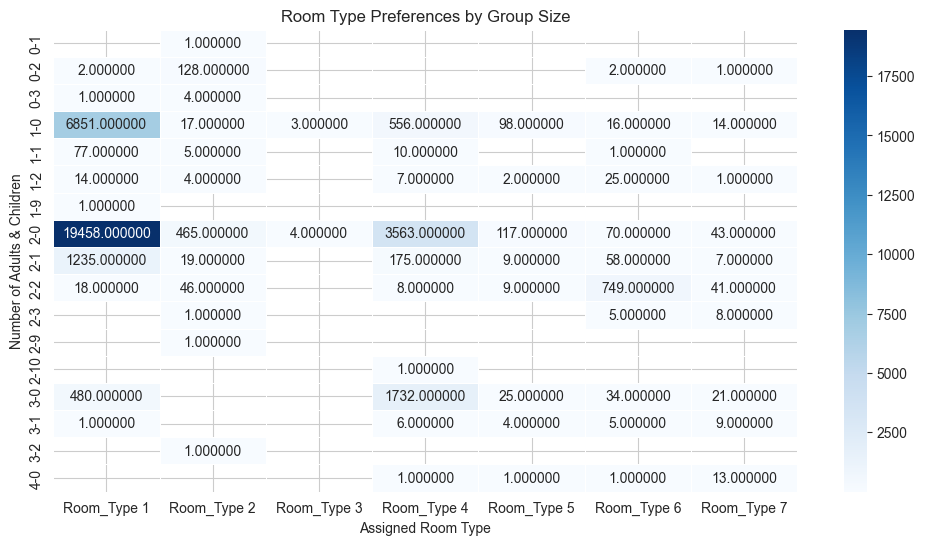

In [46]:
# Aggregate data for room type preference based on group size
room_pref = data.groupby(['number of adults', 'number of children', 'room type']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(room_pref, annot=True, fmt="f", cmap="Blues", linewidths=0.5)
plt.xlabel("Assigned Room Type")
plt.ylabel("Number of Adults & Children")
plt.title("Room Type Preferences by Group Size")
plt.show()

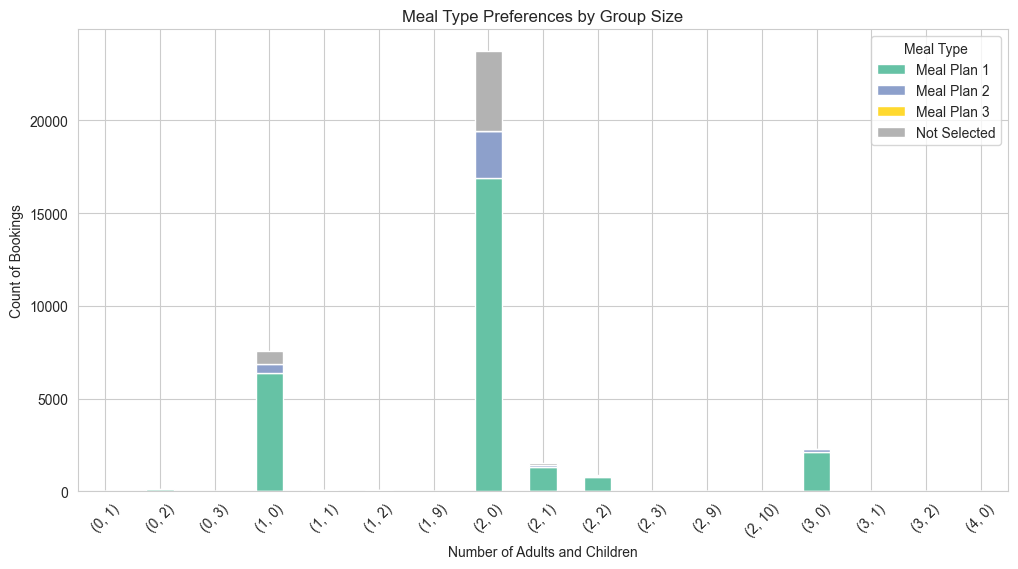

In [47]:
# Aggregate data for meal type preference based on group size
meal_pref = data.groupby(['number of adults', 'number of children', 'type of meal']).size().unstack()

# Plot meal preferences by group size
meal_pref.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Set2")
plt.xlabel("Number of Adults and Children")
plt.ylabel("Count of Bookings")
plt.title("Meal Type Preferences by Group Size")
plt.legend(title="Meal Type")
plt.xticks(rotation=45)
plt.show()

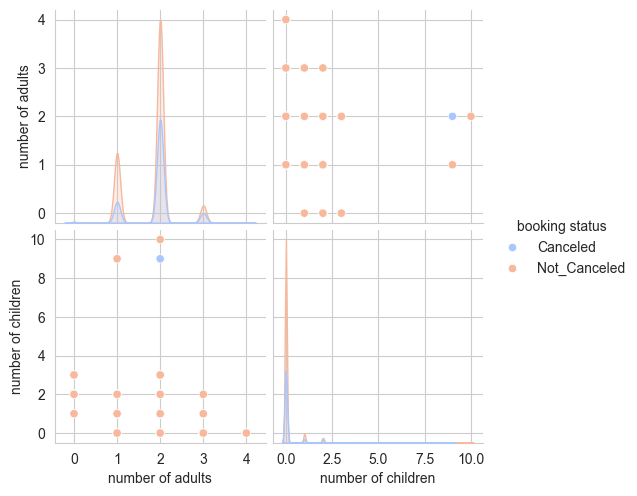

In [48]:
# Selecting relevant numerical columns
sns.pairplot(data, vars=['number of adults', 'number of children'], hue='booking status', palette='coolwarm')
plt.show()


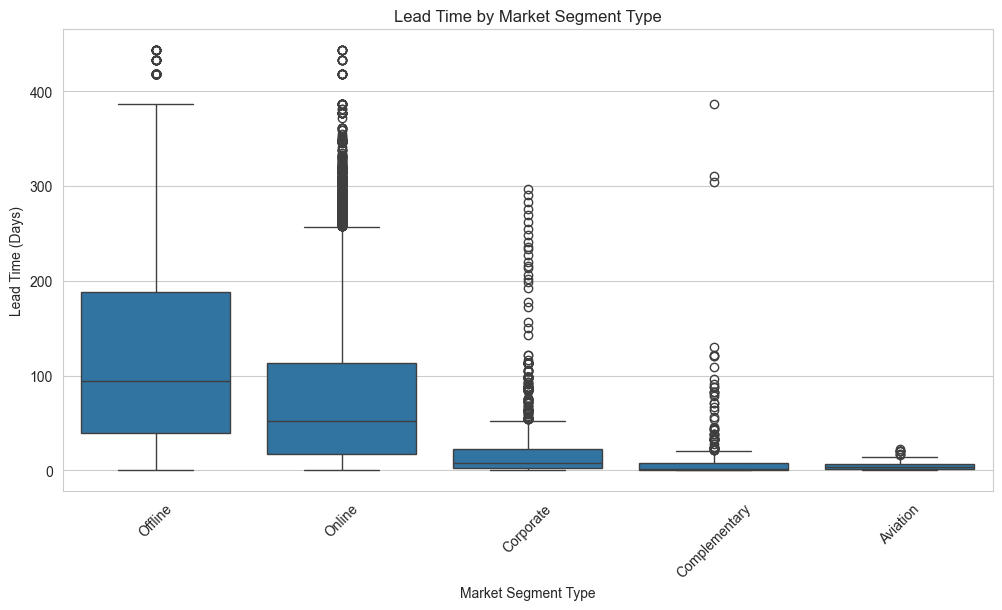

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='market segment type', y='lead time', data=data)
plt.xticks(rotation=45)
plt.title('Lead Time by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Lead Time (Days)')
plt.show()


<Figure size 1200x600 with 0 Axes>

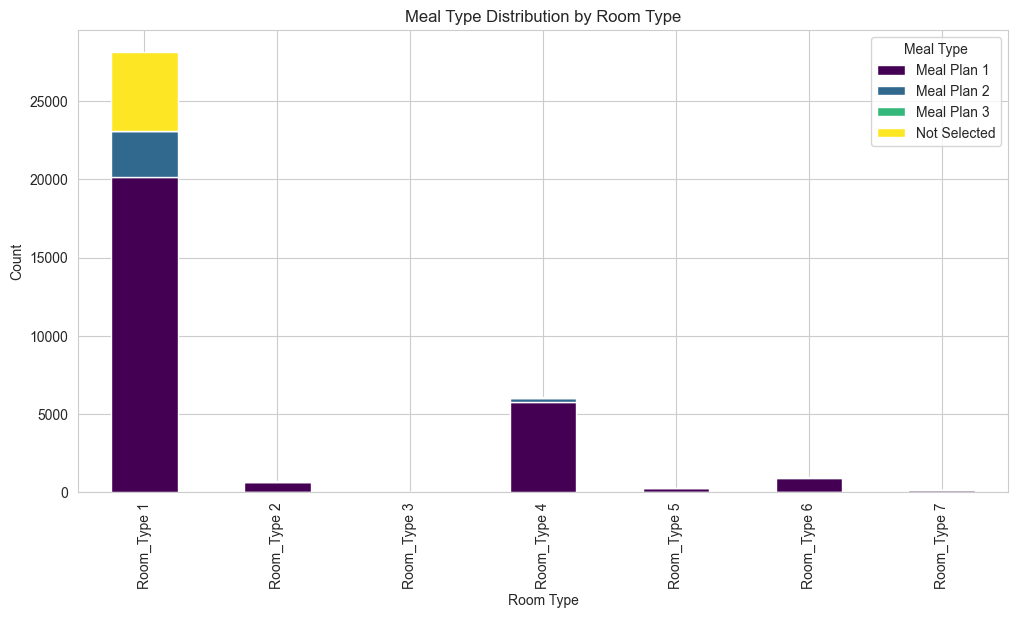

In [50]:
plt.figure(figsize=(12, 6))
room_meal_counts = data.groupby(['room type', 'type of meal']).size().unstack()
room_meal_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Meal Type Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title="Meal Type")
plt.show()


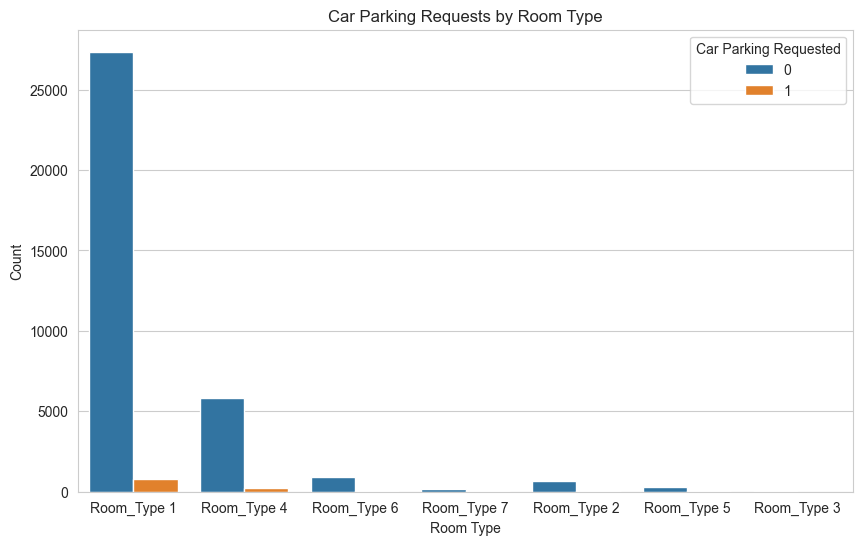

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', hue='car parking space', data=data)
plt.title('Car Parking Requests by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title="Car Parking Requested")
plt.show()


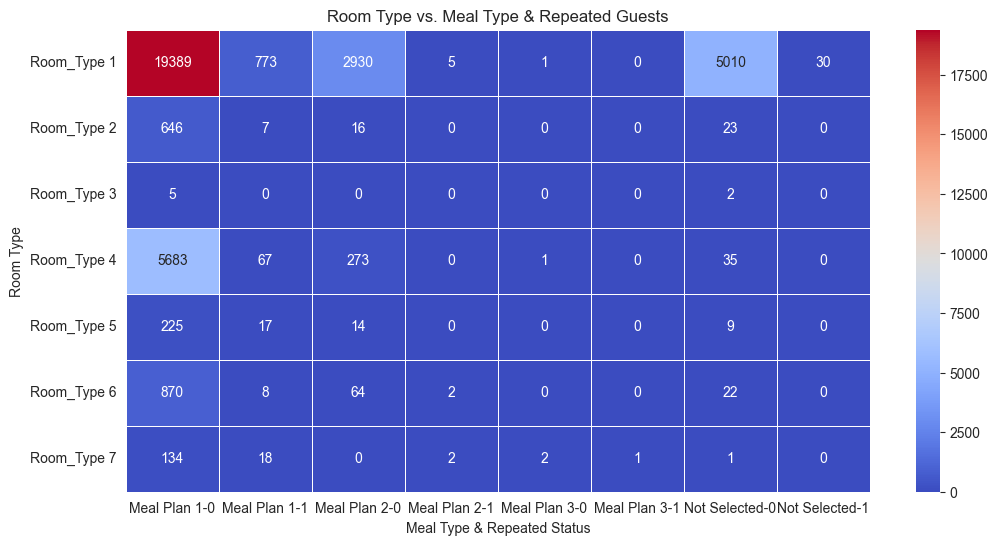

In [52]:
plt.figure(figsize=(12, 6))
heatmap_data = data.pivot_table(index='room type', columns=['type of meal', 'repeated'], aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title('Room Type vs. Meal Type & Repeated Guests')
plt.xlabel('Meal Type & Repeated Status')
plt.ylabel('Room Type')
plt.show()


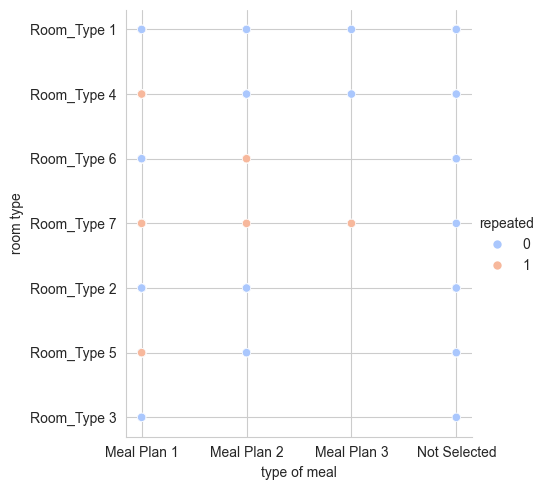

In [60]:
# plt.figure(figsize=(12, 6))
sns.relplot(x='type of meal', y='room type', hue='repeated', data=data, palette='coolwarm')
# plt.xticks(rotation=45)
# plt.title('Meal Type vs. Room Type (Colored by Repeated Guests)')
# plt.xlabel('Meal Type')
# plt.ylabel('Room Type')
# plt.legend(title='Repeated Guest')
# plt.show()


## Key Insights from Data Analysis  

### 1. Booking Cancellation Rates  
- **67.2%** of bookings were **not canceled**, while **32.8%** were **canceled**.  
- This means that **nearly 1 in 3 reservations end in cancellation**, which is a significant portion of total bookings.  

### 2. Lead Time and Cancellations  
- Canceled bookings have a **much higher average lead time** (~139 days) compared to non-canceled bookings (~59 days).  
- This suggests that **the longer a booking is made in advance, the higher the chance of cancellation**.  

### 3. Price Impact on Cancellations  
- Bookings that were **canceled tend to have a slightly higher average price** compared to those that were not canceled.  
- This indicates that **pricing may play a role in customer decisions to cancel reservations**.  

### 4. Room Type and Cancellation Trends  
- Some **room types have noticeably higher cancellation rates** than others.  
- This implies that **certain room categories may be more prone to cancellations**, potentially due to demand fluctuations or customer preferences.  

### 5. Market Segment Influence on Cancellations  
- Different **market segments show varying cancellation trends**.  
- Some segments, like **Online bookings, may have a higher cancellation rate compared to Offline bookings**, suggesting that **customer behavior varies based on the booking channel**.  

### 6. Booking Status by Number of Adults & Children  
- The most common booking groups are **(2 adults, 0 children)** and **(1 adult, 0 children)**.  
- **Cancellation rates are significant**, especially among smaller groups.  
- Larger groups (more than 2 adults or multiple children) are much less frequent.  

### 7. Price Distribution by Group Size  
- **Smaller groups (1-3 people) show extreme price outliers**, indicating possible premium pricing or seasonal fluctuations.  
- **Larger groups (5+) have more stable and consistent pricing**, likely due to bulk discounts or family package deals.  

### 8. Room Type Preferences by Group Size  
- **Room Type 1 is the most booked room**, followed by **Room Type 4**, especially among smaller groups.  
- **Larger groups prefer Room Type 5 or 6**, suggesting that **availability of large rooms should be optimized**.  
- **Certain room types might have higher cancellation rates**, which could be linked to demand fluctuations.  

### 9. Meal Type Preferences by Group Size  
- **Meal Type 1 is the most chosen meal** for booking groups, followed by **No Meal Plan selection**, suggesting that other **meal types can be enhanced to increase their selection percentage**.  

### 10. Room Type and Meal Plan Distribution  
- **Room Type 1 is overwhelmingly the most popular**, with around 28,000 bookings.  
- **Meal Type 1 is the most commonly selected meal plan across all room types**.  
- **Room Type 4 is the second most popular room type**.  
- Many guests, especially in **Room Type 1, opt for no meal plan selection**.  

### 11. Lead Time by Market Segment  
- **Offline bookings have the highest median lead time and largest variation**.  
- **Online bookings have the second-highest lead time spread**.  
- **Corporate, Complementary, and Aviation segments tend to have shorter lead times**.  
- **Aviation segment shows the most consistent (least variable) lead times**.  

### 12. Repeated Guests  
- **Most bookings are non-repeated**.  
- **Room Type 7 has a is found in combination with all meal types** compared to other room types. 
- **Room Type and Meal Type 1 is the most common choice** for reapated bookings.

### 13. Car Parking Requests  
- **Very few guests request car parking across all room types**.  
- **Room Type 1, despite the highest number of bookings, has a relatively small proportion of parking requests**.  
- **The ratio of parking requests to total bookings is consistently low across all room types**.  
